## Run a single example of the calibration for a certain set of parameters

In [1]:
import PyPlot
const plt = PyPlot;

using PyCall
const matplotlib = pyimport("matplotlib")
rcParams = PyDict(matplotlib["rcParams"])
rcParams["font.family"] = "Times New Roman"
rcParams["font.size"] = 12;

In [33]:
include("rabi_calibration.jl")

detuning = 100e3
pi_time = 5
initial_guess = [0.7, 0.3]
tspan_ideal = 0.0:0.1:40

N = 25
tspan_experiment = 0:2:38

res = rabi_calibration(detuning, pi_time, initial_guess, N, tspan_ideal, tspan_experiment)

  0.008840 seconds (228.92 k allocations: 6.195 MiB)
  0.007686 seconds (216.69 k allocations: 5.691 MiB)
  0.007819 seconds (216.69 k allocations: 5.691 MiB)


Dict{String,Array{T,1} where T} with 5 entries:
  "ideal_curve"        => [0.0, 0.00098618, 0.00393556, 0.00882117, 0.0155996, …
  "ideal_fit_params"   => [0.626801, 0.62837]
  "experimental_data"  => [0.0, 0.4, 0.32, 0.04, 0.04, 0.52, 0.28, 0.0, 0.24, 0…
  "learned_fit_params" => [0.615244, 0.645393]
  "learned_curve"      => Any[0.0, 0.000945686, 0.00377523, 0.00846615, 0.01498…

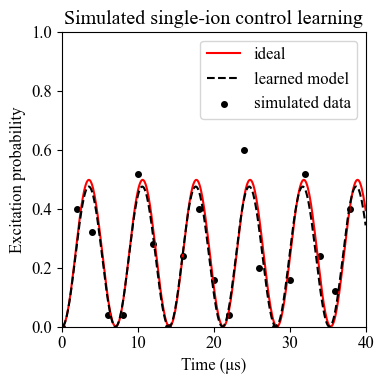

total shots=500
ideal fit parameters θ₁=0.6268, θ₂=0.6284
learned fit parameters θ₁=0.6152, θ₂=0.6454
fit parameters relative error=0.0228


In [34]:
ideal = res["ideal_curve"]
ideal_fit_params = res["ideal_fit_params"]
experimental = res["experimental_data"]
learned = res["learned_curve"]
learned_fit_params = res["learned_fit_params"]

mean_error = mean(abs.(ideal_fit_params - learned_fit_params))
relative_error = mean_error / mean(ideal_fit_params)

plt.figure(figsize=(4,4))
plt.plot(tspan_ideal, ideal, "-", label="ideal", color="red")
plt.scatter(tspan_experiment, experimental, label="simulated data", s=16, color="black")
plt.plot(tspan_ideal, learned, "--", label="learned model", color="black")

println("total shots=$(N * length(tspan_experiment))")
println("ideal fit parameters θ₁=$(round(ideal_fit_params[1]; digits=4)), θ₂=$(round(ideal_fit_params[2]; digits=4))")
println("learned fit parameters θ₁=$(round(learned_fit_params[1]; digits=4)), θ₂=$(round(learned_fit_params[2]; digits=4))")
println("fit parameters relative error=$(round(relative_error; digits=4))")

plt.title("Simulated single-ion control learning")
plt.xlim(tspan_ideal[1], tspan_ideal[end])
plt.ylim(0, 1)
plt.xlabel("Time (μs)")
plt.ylabel("Excitation probability")
plt.legend();
plt.tight_layout();
plt.savefig("control_learning_rabi_scan.pdf", bbox_inches="tight")

## Test the average error of the technique as a function of N

In [24]:
include("rabi_calibration.jl")

n_repetitions = 100
n_shots_list = [5, 10, 25, 50, 100, 250, 500, 1000]

relative_error_results = Dict()
fidelities = Dict()
for n_shots in n_shots_list 
    relative_error_results[n_shots] = []
    fidelities[n_shots] = []
    for i = 1:n_repetitions
        actual_detuning = 100e3
        actual_pi_time = 5
        initial_guess = [0.7, 0.3]
        tspan_ideal = 0:0.1:40
        tspan_experiment = 0:2:38
        res = rabi_calibration(actual_detuning, actual_pi_time, initial_guess, n_shots, tspan_ideal, tspan_experiment)

        ideal = res["ideal_curve"]
        ideal_fit_params = res["ideal_fit_params"]
        experimental = res["experimental_data"]
        learned = res["learned_curve"]
        learned_fit_params = res["learned_fit_params"]

        # calculate relative error in learned fit parameters
        mean_error = mean(abs.(ideal_fit_params - learned_fit_params))
        relative_error = mean_error / mean(ideal_fit_params)
        push!(relative_error_results[n_shots], relative_error)
        
        # calculate the resulting error in X-gate fidelity
        learned_pi_time = actual_pi_time / (ideal_fit_params[1] / learned_fit_params[1])
        learned_detuning = actual_detuning * (ideal_fit_params[2] / learned_fit_params[2])
        fidelity = rabi_fidelity(actual_detuning, actual_pi_time, learned_detuning, learned_pi_time)
        push!(fidelities[n_shots], fidelity)
    end
end

  0.008571 seconds (228.92 k allocations: 6.195 MiB)
  0.007796 seconds (216.69 k allocations: 5.691 MiB)
  0.010192 seconds (216.69 k allocations: 5.691 MiB)
  0.009286 seconds (44.54 k allocations: 1.313 MiB)
  0.008486 seconds (228.92 k allocations: 6.195 MiB)
  0.007712 seconds (216.69 k allocations: 5.691 MiB)
  0.007915 seconds (216.69 k allocations: 5.691 MiB)
  0.001267 seconds (32.30 k allocations: 879.953 KiB)
  0.009362 seconds (228.92 k allocations: 6.195 MiB)
  0.008743 seconds (216.69 k allocations: 5.691 MiB)
  0.010495 seconds (216.69 k allocations: 5.691 MiB)
  0.001111 seconds (29.66 k allocations: 809.078 KiB)
  0.011504 seconds (228.92 k allocations: 6.195 MiB)
  0.007942 seconds (216.69 k allocations: 5.691 MiB)
  0.007937 seconds (216.69 k allocations: 5.691 MiB)
  0.001253 seconds (33.19 k allocations: 903.578 KiB)
  0.008767 seconds (228.92 k allocations: 6.195 MiB)
  0.008908 seconds (216.69 k allocations: 5.691 MiB)
  0.008788 seconds (216.69 k allocations: 5.

  0.001409 seconds (35.83 k allocations: 974.453 KiB)
  0.011547 seconds (228.92 k allocations: 6.195 MiB)
  0.008837 seconds (216.69 k allocations: 5.691 MiB)
  0.011067 seconds (216.69 k allocations: 5.691 MiB)
  0.001341 seconds (33.19 k allocations: 903.578 KiB)
  0.009644 seconds (228.92 k allocations: 6.195 MiB)
  0.008874 seconds (216.69 k allocations: 5.691 MiB)
  0.019784 seconds (216.69 k allocations: 5.691 MiB, 57.32% gc time)
  0.002328 seconds (34.95 k allocations: 950.828 KiB)
  0.021471 seconds (228.92 k allocations: 6.195 MiB, 52.30% gc time)
  0.007962 seconds (216.69 k allocations: 5.691 MiB)
  0.008179 seconds (216.69 k allocations: 5.691 MiB)
  0.001512 seconds (31.42 k allocations: 856.328 KiB)
  0.010088 seconds (228.92 k allocations: 6.195 MiB)
  0.009658 seconds (216.69 k allocations: 5.691 MiB)
  0.007901 seconds (216.69 k allocations: 5.691 MiB)
  0.001285 seconds (34.07 k allocations: 927.203 KiB)
  0.009092 seconds (228.92 k allocations: 6.195 MiB)
  0.00864

  0.000957 seconds (22.60 k allocations: 620.078 KiB)
  0.010221 seconds (228.92 k allocations: 6.195 MiB)
  0.022885 seconds (216.69 k allocations: 5.691 MiB, 55.83% gc time)
  0.008502 seconds (216.69 k allocations: 5.691 MiB)
  0.001397 seconds (34.95 k allocations: 950.828 KiB)
  0.008931 seconds (228.92 k allocations: 6.195 MiB)
  0.008122 seconds (216.69 k allocations: 5.691 MiB)
  0.010924 seconds (216.69 k allocations: 5.691 MiB)
  0.001916 seconds (42.89 k allocations: 1.136 MiB)
  0.009262 seconds (228.92 k allocations: 6.195 MiB)
  0.007877 seconds (216.69 k allocations: 5.691 MiB)
  0.007685 seconds (216.69 k allocations: 5.691 MiB)
  0.001362 seconds (34.95 k allocations: 950.828 KiB)
  0.009223 seconds (228.92 k allocations: 6.195 MiB)
  0.008305 seconds (216.69 k allocations: 5.691 MiB)
  0.007979 seconds (216.69 k allocations: 5.691 MiB)
  0.000827 seconds (20.84 k allocations: 572.828 KiB)
  0.009261 seconds (228.92 k allocations: 6.195 MiB)
  0.009556 seconds (216.69 

  0.001587 seconds (33.19 k allocations: 903.578 KiB)
  0.015368 seconds (228.92 k allocations: 6.195 MiB)
  0.014685 seconds (216.69 k allocations: 5.691 MiB)
  0.008914 seconds (216.69 k allocations: 5.691 MiB)
  0.001190 seconds (31.42 k allocations: 856.328 KiB)
  0.009413 seconds (228.92 k allocations: 6.195 MiB)
  0.009071 seconds (216.69 k allocations: 5.691 MiB)
  0.008859 seconds (216.69 k allocations: 5.691 MiB)
  0.001456 seconds (34.07 k allocations: 927.203 KiB)
  0.009932 seconds (228.92 k allocations: 6.195 MiB)
  0.008799 seconds (216.69 k allocations: 5.691 MiB)
  0.008847 seconds (216.69 k allocations: 5.691 MiB)
  0.001206 seconds (30.54 k allocations: 832.703 KiB)
  0.009781 seconds (228.92 k allocations: 6.195 MiB)
  0.008602 seconds (216.69 k allocations: 5.691 MiB)
  0.019824 seconds (216.69 k allocations: 5.691 MiB, 57.33% gc time)
  0.001326 seconds (32.30 k allocations: 879.953 KiB)
  0.009812 seconds (228.92 k allocations: 6.195 MiB)
  0.008845 seconds (216.6

  0.001535 seconds (34.95 k allocations: 950.828 KiB)
  0.008666 seconds (228.92 k allocations: 6.195 MiB)
  0.007930 seconds (216.69 k allocations: 5.691 MiB)
  0.007864 seconds (216.69 k allocations: 5.691 MiB)
  0.000983 seconds (21.72 k allocations: 596.453 KiB)
  0.008868 seconds (228.92 k allocations: 6.195 MiB)
  0.009575 seconds (216.69 k allocations: 5.691 MiB)
  0.007910 seconds (216.69 k allocations: 5.691 MiB)
  0.001690 seconds (35.83 k allocations: 974.453 KiB)
  0.008858 seconds (228.92 k allocations: 6.195 MiB)
  0.008490 seconds (216.69 k allocations: 5.691 MiB)
  0.008129 seconds (216.69 k allocations: 5.691 MiB)
  0.001242 seconds (34.07 k allocations: 927.203 KiB)
  0.009257 seconds (228.92 k allocations: 6.195 MiB)
  0.008463 seconds (216.69 k allocations: 5.691 MiB)
  0.008359 seconds (216.69 k allocations: 5.691 MiB)
  0.001260 seconds (34.07 k allocations: 927.203 KiB)
  0.008857 seconds (228.92 k allocations: 6.195 MiB)
  0.008176 seconds (216.69 k allocations:

  0.001371 seconds (34.95 k allocations: 950.828 KiB)
  0.008984 seconds (228.92 k allocations: 6.195 MiB)
  0.008119 seconds (216.69 k allocations: 5.691 MiB)
  0.008083 seconds (216.69 k allocations: 5.691 MiB)
  0.001026 seconds (26.13 k allocations: 714.578 KiB)
  0.022553 seconds (228.92 k allocations: 6.195 MiB, 56.04% gc time)
  0.008014 seconds (216.69 k allocations: 5.691 MiB)
  0.007785 seconds (216.69 k allocations: 5.691 MiB)
  0.001698 seconds (35.83 k allocations: 974.453 KiB)
  0.010051 seconds (228.92 k allocations: 6.195 MiB)
  0.008565 seconds (216.69 k allocations: 5.691 MiB)
  0.008361 seconds (216.69 k allocations: 5.691 MiB)
  0.001533 seconds (35.83 k allocations: 974.453 KiB)
  0.009371 seconds (228.92 k allocations: 6.195 MiB)
  0.008493 seconds (216.69 k allocations: 5.691 MiB)
  0.020463 seconds (216.69 k allocations: 5.691 MiB, 55.86% gc time)
  0.001242 seconds (32.30 k allocations: 879.953 KiB)
  0.008860 seconds (228.92 k allocations: 6.195 MiB)
  0.00841

  0.012461 seconds (216.69 k allocations: 5.691 MiB)
  0.001529 seconds (32.30 k allocations: 879.953 KiB)
  0.009735 seconds (228.92 k allocations: 6.195 MiB)
  0.008026 seconds (216.69 k allocations: 5.691 MiB)
  0.007939 seconds (216.69 k allocations: 5.691 MiB)
  0.001322 seconds (31.42 k allocations: 856.328 KiB)
  0.009163 seconds (228.92 k allocations: 6.195 MiB)
  0.008387 seconds (216.69 k allocations: 5.691 MiB)
  0.008003 seconds (216.69 k allocations: 5.691 MiB)
  0.001368 seconds (33.19 k allocations: 903.578 KiB)
  0.009628 seconds (228.92 k allocations: 6.195 MiB)
  0.020768 seconds (216.69 k allocations: 5.691 MiB, 57.24% gc time)
  0.008283 seconds (216.69 k allocations: 5.691 MiB)
  0.001351 seconds (34.95 k allocations: 950.828 KiB)
  0.014227 seconds (228.92 k allocations: 6.195 MiB)
  0.010126 seconds (216.69 k allocations: 5.691 MiB)
  0.008557 seconds (216.69 k allocations: 5.691 MiB)
  0.001425 seconds (35.83 k allocations: 974.453 KiB)
  0.008839 seconds (228.9

  0.007780 seconds (216.69 k allocations: 5.691 MiB)
  0.001398 seconds (33.19 k allocations: 903.578 KiB)
  0.009965 seconds (228.92 k allocations: 6.195 MiB)
  0.008815 seconds (216.69 k allocations: 5.691 MiB)
  0.008275 seconds (216.69 k allocations: 5.691 MiB)
  0.001260 seconds (32.30 k allocations: 879.953 KiB)
  0.009128 seconds (228.92 k allocations: 6.195 MiB)
  0.008110 seconds (216.69 k allocations: 5.691 MiB)
  0.007850 seconds (216.69 k allocations: 5.691 MiB)
  0.001359 seconds (34.07 k allocations: 927.203 KiB)
  0.015738 seconds (228.92 k allocations: 6.195 MiB)
  0.008103 seconds (216.69 k allocations: 5.691 MiB)
  0.007995 seconds (216.69 k allocations: 5.691 MiB)
  0.001413 seconds (33.19 k allocations: 903.578 KiB)
  0.009981 seconds (228.92 k allocations: 6.195 MiB)
  0.008944 seconds (216.69 k allocations: 5.691 MiB)
  0.008302 seconds (216.69 k allocations: 5.691 MiB)
  0.002098 seconds (31.42 k allocations: 856.328 KiB)
  0.011225 seconds (228.92 k allocations:

  0.012967 seconds (216.69 k allocations: 5.691 MiB)
  0.001348 seconds (34.07 k allocations: 927.203 KiB)
  0.008800 seconds (228.92 k allocations: 6.195 MiB)
  0.008144 seconds (216.69 k allocations: 5.691 MiB)
  0.008343 seconds (216.69 k allocations: 5.691 MiB)
  0.001300 seconds (34.07 k allocations: 927.203 KiB)
  0.009006 seconds (228.92 k allocations: 6.195 MiB)
  0.007980 seconds (216.69 k allocations: 5.691 MiB)
  0.008075 seconds (216.69 k allocations: 5.691 MiB)
  0.001445 seconds (34.07 k allocations: 927.203 KiB)
  0.009837 seconds (228.92 k allocations: 6.195 MiB)
  0.011106 seconds (216.69 k allocations: 5.691 MiB)
  0.020521 seconds (216.69 k allocations: 5.691 MiB, 56.31% gc time)
  0.001319 seconds (34.07 k allocations: 927.203 KiB)
  0.008877 seconds (228.92 k allocations: 6.195 MiB)
  0.007942 seconds (216.69 k allocations: 5.691 MiB)
  0.007862 seconds (216.69 k allocations: 5.691 MiB)
  0.001708 seconds (32.30 k allocations: 879.953 KiB)
  0.009770 seconds (228.9

  0.001364 seconds (34.07 k allocations: 927.203 KiB)
  0.009634 seconds (228.92 k allocations: 6.195 MiB)
  0.009011 seconds (216.69 k allocations: 5.691 MiB)
  0.008593 seconds (216.69 k allocations: 5.691 MiB)
  0.001287 seconds (34.07 k allocations: 927.203 KiB)
  0.010252 seconds (228.92 k allocations: 6.195 MiB)
  0.008274 seconds (216.69 k allocations: 5.691 MiB)
  0.007854 seconds (216.69 k allocations: 5.691 MiB)
  0.001321 seconds (33.19 k allocations: 903.578 KiB)
  0.008958 seconds (228.92 k allocations: 6.195 MiB)
  0.010432 seconds (216.69 k allocations: 5.691 MiB)
  0.008545 seconds (216.69 k allocations: 5.691 MiB)
  0.001298 seconds (33.19 k allocations: 903.578 KiB)
  0.008819 seconds (228.92 k allocations: 6.195 MiB)
  0.008575 seconds (216.69 k allocations: 5.691 MiB)
  0.007997 seconds (216.69 k allocations: 5.691 MiB)
  0.001268 seconds (32.30 k allocations: 879.953 KiB)
  0.008968 seconds (228.92 k allocations: 6.195 MiB)
  0.008132 seconds (216.69 k allocations:

  0.001355 seconds (33.19 k allocations: 903.578 KiB)
  0.008783 seconds (228.92 k allocations: 6.195 MiB)
  0.008288 seconds (216.69 k allocations: 5.691 MiB)
  0.008626 seconds (216.69 k allocations: 5.691 MiB)
  0.001358 seconds (33.19 k allocations: 903.578 KiB)
  0.021012 seconds (228.92 k allocations: 6.195 MiB, 54.94% gc time)
  0.010872 seconds (216.69 k allocations: 5.691 MiB)
  0.008085 seconds (216.69 k allocations: 5.691 MiB)
  0.001283 seconds (33.19 k allocations: 903.578 KiB)
  0.008863 seconds (228.92 k allocations: 6.195 MiB)
  0.007748 seconds (216.69 k allocations: 5.691 MiB)
  0.007894 seconds (216.69 k allocations: 5.691 MiB)
  0.001379 seconds (34.07 k allocations: 927.203 KiB)
  0.009772 seconds (228.92 k allocations: 6.195 MiB)
  0.008646 seconds (216.69 k allocations: 5.691 MiB)
  0.020602 seconds (216.69 k allocations: 5.691 MiB, 58.36% gc time)
  0.001628 seconds (33.19 k allocations: 903.578 KiB)
  0.008748 seconds (228.92 k allocations: 6.195 MiB)
  0.00827

  0.001281 seconds (33.19 k allocations: 903.578 KiB)
  0.009257 seconds (228.92 k allocations: 6.195 MiB)
  0.008961 seconds (216.69 k allocations: 5.691 MiB)
  0.008820 seconds (216.69 k allocations: 5.691 MiB)
  0.001395 seconds (33.19 k allocations: 903.578 KiB)
  0.021503 seconds (228.92 k allocations: 6.195 MiB, 53.64% gc time)
  0.008113 seconds (216.69 k allocations: 5.691 MiB)
  0.008316 seconds (216.69 k allocations: 5.691 MiB)
  0.001368 seconds (34.95 k allocations: 950.828 KiB)
  0.008837 seconds (228.92 k allocations: 6.195 MiB)
  0.008050 seconds (216.69 k allocations: 5.691 MiB)
  0.008230 seconds (216.69 k allocations: 5.691 MiB)
  0.001790 seconds (34.07 k allocations: 927.203 KiB)
  0.009155 seconds (228.92 k allocations: 6.195 MiB)
  0.009318 seconds (216.69 k allocations: 5.691 MiB)
  0.007769 seconds (216.69 k allocations: 5.691 MiB)
  0.002663 seconds (33.19 k allocations: 903.578 KiB)
  0.009773 seconds (228.92 k allocations: 6.195 MiB)
  0.008802 seconds (216.6

  0.001707 seconds (34.07 k allocations: 927.203 KiB)
  0.009880 seconds (228.92 k allocations: 6.195 MiB)
  0.008934 seconds (216.69 k allocations: 5.691 MiB)
  0.008093 seconds (216.69 k allocations: 5.691 MiB)
  0.001490 seconds (34.95 k allocations: 950.828 KiB)
  0.008866 seconds (228.92 k allocations: 6.195 MiB)
  0.008134 seconds (216.69 k allocations: 5.691 MiB)
  0.009621 seconds (216.69 k allocations: 5.691 MiB)
  0.001771 seconds (34.07 k allocations: 927.203 KiB)
  0.011626 seconds (228.92 k allocations: 6.195 MiB)
  0.011159 seconds (216.69 k allocations: 5.691 MiB)
  0.011109 seconds (216.69 k allocations: 5.691 MiB)
  0.002375 seconds (34.95 k allocations: 950.828 KiB)
  0.011151 seconds (228.92 k allocations: 6.195 MiB)
  0.008865 seconds (216.69 k allocations: 5.691 MiB)
  0.007972 seconds (216.69 k allocations: 5.691 MiB)
  0.001311 seconds (33.19 k allocations: 903.578 KiB)
  0.008803 seconds (228.92 k allocations: 6.195 MiB)
  0.008049 seconds (216.69 k allocations:

  0.001360 seconds (34.07 k allocations: 927.203 KiB)
  0.008837 seconds (228.92 k allocations: 6.195 MiB)
  0.008302 seconds (216.69 k allocations: 5.691 MiB)
  0.008077 seconds (216.69 k allocations: 5.691 MiB)
  0.001279 seconds (33.19 k allocations: 903.578 KiB)
  0.008881 seconds (228.92 k allocations: 6.195 MiB)
  0.009008 seconds (216.69 k allocations: 5.691 MiB)
  0.009781 seconds (216.69 k allocations: 5.691 MiB)
  0.001388 seconds (33.19 k allocations: 903.578 KiB)
  0.009609 seconds (228.92 k allocations: 6.195 MiB)
  0.008651 seconds (216.69 k allocations: 5.691 MiB)
  0.008971 seconds (216.69 k allocations: 5.691 MiB)
  0.001386 seconds (34.07 k allocations: 927.203 KiB)
  0.011182 seconds (228.92 k allocations: 6.195 MiB)
  0.011107 seconds (216.69 k allocations: 5.691 MiB)
  0.009131 seconds (216.69 k allocations: 5.691 MiB)
  0.001450 seconds (33.19 k allocations: 903.578 KiB)
  0.021547 seconds (228.92 k allocations: 6.195 MiB, 55.67% gc time)
  0.008416 seconds (216.6

  0.001722 seconds (34.07 k allocations: 927.203 KiB)
  0.010843 seconds (228.92 k allocations: 6.195 MiB)
  0.009815 seconds (216.69 k allocations: 5.691 MiB)
  0.014108 seconds (216.69 k allocations: 5.691 MiB)
  0.001282 seconds (33.19 k allocations: 903.578 KiB)
  0.010137 seconds (228.92 k allocations: 6.195 MiB)
  0.008689 seconds (216.69 k allocations: 5.691 MiB)
  0.009437 seconds (216.69 k allocations: 5.691 MiB)
  0.001562 seconds (33.19 k allocations: 903.578 KiB)
  0.008782 seconds (228.92 k allocations: 6.195 MiB)
  0.008550 seconds (216.69 k allocations: 5.691 MiB)
  0.008583 seconds (216.69 k allocations: 5.691 MiB)
  0.001299 seconds (33.19 k allocations: 903.578 KiB)
  0.008729 seconds (228.92 k allocations: 6.195 MiB)
  0.008899 seconds (216.69 k allocations: 5.691 MiB)
  0.008925 seconds (216.69 k allocations: 5.691 MiB)
  0.001284 seconds (33.19 k allocations: 903.578 KiB)
  0.011613 seconds (228.92 k allocations: 6.195 MiB)
  0.008554 seconds (216.69 k allocations:

  0.001273 seconds (33.19 k allocations: 903.578 KiB)
  0.011991 seconds (228.92 k allocations: 6.195 MiB)
  0.008138 seconds (216.69 k allocations: 5.691 MiB)
  0.007930 seconds (216.69 k allocations: 5.691 MiB)
  0.014778 seconds (33.19 k allocations: 903.578 KiB, 87.62% gc time)
  0.010242 seconds (228.92 k allocations: 6.195 MiB)
  0.008535 seconds (216.69 k allocations: 5.691 MiB)
  0.008334 seconds (216.69 k allocations: 5.691 MiB)
  0.001350 seconds (32.30 k allocations: 879.953 KiB)
  0.009770 seconds (228.92 k allocations: 6.195 MiB)
  0.020242 seconds (216.69 k allocations: 5.691 MiB, 59.00% gc time)
  0.008048 seconds (216.69 k allocations: 5.691 MiB)
  0.001415 seconds (34.07 k allocations: 927.203 KiB)
  0.010972 seconds (228.92 k allocations: 6.195 MiB)
  0.008902 seconds (216.69 k allocations: 5.691 MiB)
  0.008423 seconds (216.69 k allocations: 5.691 MiB)
  0.001283 seconds (33.19 k allocations: 903.578 KiB)
  0.009699 seconds (228.92 k allocations: 6.195 MiB)
  0.00961

  0.001812 seconds (33.19 k allocations: 903.578 KiB)
  0.013599 seconds (228.92 k allocations: 6.195 MiB)
  0.008089 seconds (216.69 k allocations: 5.691 MiB)
  0.008002 seconds (216.69 k allocations: 5.691 MiB)
  0.001398 seconds (33.19 k allocations: 903.578 KiB)
  0.022375 seconds (228.92 k allocations: 6.195 MiB, 54.85% gc time)
  0.008134 seconds (216.69 k allocations: 5.691 MiB)
  0.008042 seconds (216.69 k allocations: 5.691 MiB)
  0.001481 seconds (34.07 k allocations: 927.203 KiB)
  0.009821 seconds (228.92 k allocations: 6.195 MiB)
  0.009226 seconds (216.69 k allocations: 5.691 MiB)
  0.008129 seconds (216.69 k allocations: 5.691 MiB)
  0.001319 seconds (33.19 k allocations: 903.578 KiB)
  0.008941 seconds (228.92 k allocations: 6.195 MiB)
  0.008403 seconds (216.69 k allocations: 5.691 MiB)
  0.007883 seconds (216.69 k allocations: 5.691 MiB)
  0.001331 seconds (34.07 k allocations: 927.203 KiB)
  0.008985 seconds (228.92 k allocations: 6.195 MiB)
  0.008071 seconds (216.6

  0.001835 seconds (34.07 k allocations: 927.203 KiB)
  0.011360 seconds (228.92 k allocations: 6.195 MiB)
  0.007864 seconds (216.69 k allocations: 5.691 MiB)
  0.008826 seconds (216.69 k allocations: 5.691 MiB)
  0.001329 seconds (34.07 k allocations: 927.203 KiB)
  0.009084 seconds (228.92 k allocations: 6.195 MiB)
  0.007985 seconds (216.69 k allocations: 5.691 MiB)
  0.008817 seconds (216.69 k allocations: 5.691 MiB)
  0.001527 seconds (33.19 k allocations: 903.578 KiB)
  0.008769 seconds (228.92 k allocations: 6.195 MiB)
  0.008324 seconds (216.69 k allocations: 5.691 MiB)
  0.007755 seconds (216.69 k allocations: 5.691 MiB)
  0.001742 seconds (33.19 k allocations: 903.578 KiB)
  0.010108 seconds (228.92 k allocations: 6.195 MiB)
  0.008469 seconds (216.69 k allocations: 5.691 MiB)
  0.008072 seconds (216.69 k allocations: 5.691 MiB)
  0.001541 seconds (33.19 k allocations: 903.578 KiB)
  0.008665 seconds (228.92 k allocations: 6.195 MiB)
  0.007853 seconds (216.69 k allocations:

  0.001757 seconds (34.07 k allocations: 927.203 KiB)
  0.021117 seconds (228.92 k allocations: 6.195 MiB, 55.20% gc time)
  0.007897 seconds (216.69 k allocations: 5.691 MiB)
  0.008178 seconds (216.69 k allocations: 5.691 MiB)
  0.001308 seconds (34.07 k allocations: 927.203 KiB)
  0.008532 seconds (228.92 k allocations: 6.195 MiB)
  0.008007 seconds (216.69 k allocations: 5.691 MiB)
  0.008365 seconds (216.69 k allocations: 5.691 MiB)
  0.001428 seconds (33.19 k allocations: 903.578 KiB)
  0.008795 seconds (228.92 k allocations: 6.195 MiB)
  0.008084 seconds (216.69 k allocations: 5.691 MiB)
  0.007926 seconds (216.69 k allocations: 5.691 MiB)
  0.001381 seconds (33.19 k allocations: 903.578 KiB)
  0.009473 seconds (228.92 k allocations: 6.195 MiB)
  0.020643 seconds (216.69 k allocations: 5.691 MiB, 59.15% gc time)
  0.007980 seconds (216.69 k allocations: 5.691 MiB)
  0.001356 seconds (34.07 k allocations: 927.203 KiB)
  0.008904 seconds (228.92 k allocations: 6.195 MiB)
  0.00793

  0.001305 seconds (33.19 k allocations: 903.578 KiB)
  0.008849 seconds (228.92 k allocations: 6.195 MiB)
  0.008205 seconds (216.69 k allocations: 5.691 MiB)
  0.008050 seconds (216.69 k allocations: 5.691 MiB)
  0.001281 seconds (34.07 k allocations: 927.203 KiB)
  0.009044 seconds (228.92 k allocations: 6.195 MiB)
  0.008483 seconds (216.69 k allocations: 5.691 MiB)
  0.020332 seconds (216.69 k allocations: 5.691 MiB, 60.39% gc time)
  0.001279 seconds (33.19 k allocations: 903.578 KiB)
  0.009048 seconds (228.92 k allocations: 6.195 MiB)
  0.007840 seconds (216.69 k allocations: 5.691 MiB)
  0.008011 seconds (216.69 k allocations: 5.691 MiB)
  0.001548 seconds (34.07 k allocations: 927.203 KiB)
  0.009607 seconds (228.92 k allocations: 6.195 MiB)
  0.008589 seconds (216.69 k allocations: 5.691 MiB)
  0.008061 seconds (216.69 k allocations: 5.691 MiB)
  0.001714 seconds (34.07 k allocations: 927.203 KiB)
  0.009216 seconds (228.92 k allocations: 6.195 MiB)
  0.008587 seconds (216.6

  0.010649 seconds (216.69 k allocations: 5.691 MiB)
  0.001653 seconds (33.19 k allocations: 903.578 KiB)
  0.011338 seconds (228.92 k allocations: 6.195 MiB)
  0.008061 seconds (216.69 k allocations: 5.691 MiB)
  0.008367 seconds (216.69 k allocations: 5.691 MiB)
  0.001350 seconds (34.07 k allocations: 927.203 KiB)
  0.008561 seconds (228.92 k allocations: 6.195 MiB)
  0.008360 seconds (216.69 k allocations: 5.691 MiB)
  0.008031 seconds (216.69 k allocations: 5.691 MiB)
  0.001319 seconds (34.07 k allocations: 927.203 KiB)
  0.008798 seconds (228.92 k allocations: 6.195 MiB)
  0.010442 seconds (216.69 k allocations: 5.691 MiB)
  0.008050 seconds (216.69 k allocations: 5.691 MiB)
  0.001305 seconds (33.19 k allocations: 903.578 KiB)
  0.008825 seconds (228.92 k allocations: 6.195 MiB)
  0.008644 seconds (216.69 k allocations: 5.691 MiB)
  0.008060 seconds (216.69 k allocations: 5.691 MiB)
  0.001633 seconds (33.19 k allocations: 903.578 KiB)
  0.008721 seconds (228.92 k allocations:

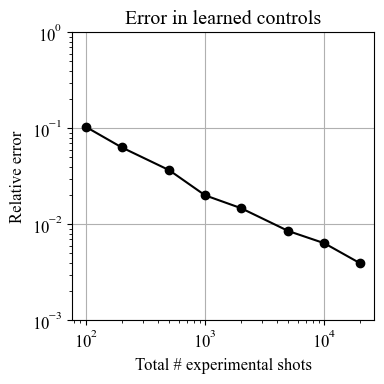

In [35]:
import PyPlot
const plt = PyPlot;

total_n_shots = [n_shots * length(tspan_experiment) for n_shots in n_shots_list]

relative_error_means = []
for n_shots in n_shots_list
    push!(relative_error_means, mean(relative_error_results[n_shots]))
end

plt.figure(figsize=(4,4))
plt.plot(total_n_shots, relative_error_means, "-", marker="o", color="black")

plt.title("Error in learned controls")
plt.ylim(1e-3, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total # experimental shots")
plt.ylabel("Relative error")
plt.grid();
plt.tight_layout();
plt.savefig("control_learning_rabi_relative_error.pdf", bbox_inches="tight")

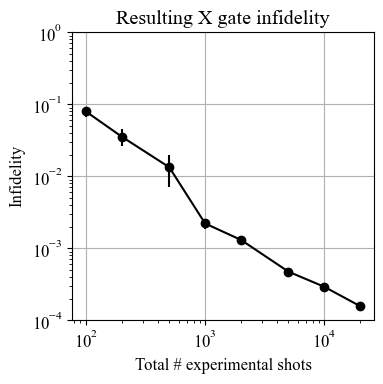

In [32]:
import PyPlot
const plt = PyPlot;
using Statistics

total_n_shots = [n_shots * length(tspan_experiment) for n_shots in n_shots_list]

fidelity_means = []
fidelity_stderrs = []
for n_shots in n_shots_list
    push!(fidelity_means, mean(fidelities[n_shots]))
    push!(fidelity_stderrs, Statistics.std(fidelities[n_shots]) / sqrt(length(fidelities[n_shots])))
end

plt.figure(figsize=(4,4))
plt.errorbar(x=total_n_shots, y=1 .- fidelity_means, yerr=fidelity_stderrs, linestyle="-", marker="o", color="black")

plt.title("Resulting X gate infidelity")
plt.ylim(1e-4, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total # experimental shots")
plt.ylabel("Infidelity")
plt.grid();
plt.tight_layout();
plt.savefig("control_learning_rabi_infidelity.pdf", bbox_inches="tight")

## Print the raw result data

In [27]:
print(relative_error_results)

Dict{Any,Any}(25 => Any[0.07644978918265471, 0.02218026089413726, 0.007489235827978999, 0.03934072149934442, 0.05371914958587546, 0.015126544697028305, 0.0008728665723708495, 0.04805614598184888, 0.029007531805298564, 0.024330789426277748, 0.007782632813303311, 0.03526545931715037, 0.04311895950233939, 0.004615058118997395, 0.04403363094066811, 0.38473811487205645, 0.008513447537940111, 0.01743365068704266, 0.034263088678803164, 0.019081728438462904, 0.023947484925694484, 0.05273899790714502, 0.03753872022043463, 0.010515636258570809, 0.056572566844332636, 0.06718942563054635, 0.037601068584811694, 0.03492186262022557, 0.031086185451147278, 0.07163610515620057, 0.02457376947268812, 0.052460097239252663, 0.05243110816771588, 0.01125841946092563, 0.06720470018767481, 0.008060175023785842, 0.018660446270331792, 0.01498861787515355, 0.06913442095879727, 0.002338783656107159, 0.043829879883140646, 0.019232841244962374, 0.042912573163955685, 0.01863051944600246, 0.006068434916772937, 0.02453

, 0.000652899719694774, 0.003648443193681398, 0.0034266872406575086, 0.0092831964323643, 0.00065161221926581, 0.005251918163884598, 0.006444087311567348, 0.0016453123200412582, 0.003585253911083027, 0.0023167041685322794, 0.006295515383461232, 0.009055284849146457, 0.009041239902718603, 0.004503709056104357, 0.003641063872155022, 0.008496319274700013, 0.013712085407039587, 0.00571380555524688, 0.0022309372075971006, 0.0006274085457414791, 0.0016226714906449554, 0.0032477520171757656, 0.0010072602757545943, 0.012053184170450086, 0.0005645098416451954, 0.006785518714575738, 0.006192366446835456, 0.003457328759244901, 0.0010202974154909642],5 => Any[0.1314080662933125, 0.044054569087213245, 0.11659988651053446, 0.01210943949468926, 0.07755841409555728, 0.031332199309184204, 0.3729347438813916, 0.0927362147085792, 0.06366380592996326, 0.3197371736513027, 0.03775413817988166, 0.08408059141364804, 0.16481207649206353, 0.06615733695235007, 0.020268628271482427, 0.1459101662100507, 0.030693061

In [28]:
print(fidelities)

Dict{Any,Any}(25 => Any[0.9809389645489622, 0.9985962651958857, 0.9998346933549535, 0.9949482137575976, 0.9917928023020794, 0.9991710531635365, 0.9999385394375984, 0.9922703704273763, 0.9970603649287288, 0.9977059588406351, 0.9996878770969471, 0.9957332536375637, 0.9936108306821876, 0.999915276327389, 0.9934387220987656, 0.5456955295718892, 0.9997961832060518, 0.998216099446445, 0.9961329978733391, 0.9974864143584493, 0.99790263206102, 0.989840706105721, 0.9953058932586032, 0.9994600511220169, 0.9892486723945468, 0.9836609039800164, 0.9956127656210136, 0.9961294314792819, 0.9964210986014995, 0.9852038073052554, 0.9975928492831351, 0.9906339962668479, 0.9904634098853801, 0.9996296929854909, 0.9833580958419063, 0.999809755689849, 0.9990190658943013, 0.9993346583309833, 0.9801620897576461, 0.9999419406439162, 0.993489130628981, 0.9981871426241776, 0.9939915367147564, 0.9986050201973548, 0.9998785296249563, 0.9977105686742496, 0.9885178423109822, 0.9992121934984347, 0.9989891152661118, 0.9

, 0.9995403551577162, 0.9997984619670267, 0.9999177393506028, 0.9991048609753658, 0.997712274948738, 0.999419213342076, 0.997939764642732, 0.999884782859507, 0.999896650284477, 0.9998997409316407, 0.9974891005550226, 0.9999476667816249, 0.9996621280499934, 0.9971989189305978, 0.9996734182233069, 0.9989852457920984, 0.9998917165372885, 0.9991311828110268, 0.999634111444564, 0.9999505574278202, 0.9993578249797382, 0.9994661460665583, 0.9999328537708069, 0.9999479497292425, 0.9999039037680562, 0.9988660190557985, 0.9996236670066884, 0.99988085408335, 0.99954285049697, 0.9998896407141759, 0.9996480134192345, 0.9997510899830876, 0.9997622884060691, 0.9999296446331531, 0.9998956570018073, 0.9999468933532677, 0.9999521128145248, 0.9996053695307252, 0.9998806152786639, 0.9990994487485331, 0.9995028642157483, 0.9990656193814459, 0.9995597177910079, 0.9998854032079851, 0.9996960216879326, 0.9999520111288737, 0.9990762504792571, 0.9999466567482627, 0.9999197599937348, 0.9999066716893833, 0.999523